# Machine Replacement Strategy

A machine required for a company operations costs 10,000 USD and has operating costs of 2,000 USD in the first year. The operating costs increase by 1,000 USD each year thereafter. We assume that the operating costs occur at the end of each year. The interest rate is 10%. 

How long should be the machine kept untile it is replaced by a new identical machine? Assume that due to its specialization the machine has no salvage value.

### Solution

The equation used to solve the problem looks as follows

$$
PV_{total} = PV_{1 cycle} + PV_{total} * (\frac{1}{1.1})^k
$$

where PV stands for present value. 

$PV_{1 cycle}$ is the present value of the first machine cycle.

We will calculate the $PV_{total}$ for one, two, three years, and so on cycles, and select the one
that ensures the lowest present value

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# helper directive allowing to plot within Jupyter Notebook
%matplotlib inline

In [161]:
# Settings

MACHINE_COST = 10000
INITIAL_OPERATING_COST = 2000
OPERATING_COST_INCREASE = 1000
INTEREST_RATE = 0.1

In [162]:
# PV one cycle

def pv_one(cycle_length: int,
           machine_cost: float=MACHINE_COST, 
           initial_operation_cost: float=INITIAL_OPERATING_COST, 
           operation_cost_increase: float=OPERATING_COST_INCREASE, 
           interest_rate:float=INTEREST_RATE):
    
    pvk = 0
    for i in range(1, cycle_length+1):
        pvk += (initial_operation_cost + operation_cost_increase * (i-1)) / 1.1**i
        
    pv = machine_cost + pvk
    return pv


# PV total 

def pv_total(pv_one, cycle_length):
    return pv_one / (1-1/1.1**cycle_length)
    

In [169]:
# PV Computations

data = {}

for i in range(1, 21):
    pv1 = pv_one(i)
    pv = pv_total(pv1, i)
    data[i] = round(pv, 2)
    

In [170]:
# PV Minimum Computations
min_pv = data[1]
min_years = 1

for key, val in data.items():
    if val < min_pv:
        min_pv = val
        min_years = key
        
print("Min. PV:", min_pv)
print("Cycle Length:", min_years)




Min. PV: 64481.01
Cycle Length: 5


In [171]:
# Presenting Results

df = pd.DataFrame.from_dict(data, orient="index", columns=["PV"])
df.rename_axis("Year")

,PV
Year,
1,130000.00
2,82380.95
3,69577.04
4,65358.76
5,64481.01
6,65196.31
7,66756.70
8,68789.19
9,71087.57


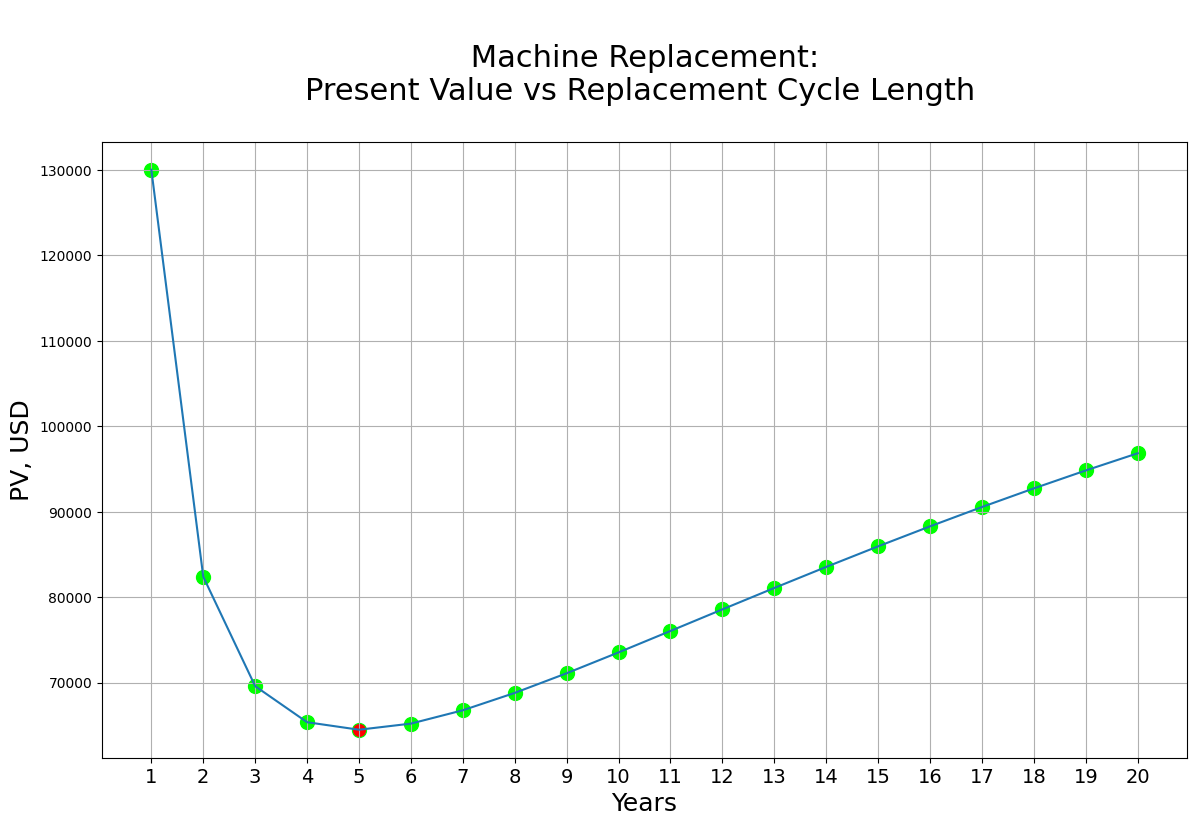

In [177]:
# Plot

plt.figure(figsize=(14, 8))
plt.plot(df)

# plot title
plt.title("\n Machine Replacement: \nPresent Value vs Replacement Cycle Length \n",
         fontsize=22)


# axis labels
plt.xlabel("Years", fontsize=18)
plt.ylabel("PV, USD", fontsize=18)

# refining the x labels grid
plt.xticks(df.index, fontsize=14)

# displaying grid on the plot
plt.grid()

# adding data points
plt.scatter(df.index, df["PV"], s=100, color="lime")

# marking minimum PV point (point at index 5)
plt.scatter(min_years, min_pv, s=70, color="red")


# displaying the plot
plt.show()

# Recommendation

In [178]:
# Show Recommendation

print(f"According to the analysis data it is recommended to replace the machine every {min_years} years.")
print(f"The present value for replacement cycle of {min_years} is {min_pv} USD.")


According to the analysis data it is recommended to replace the machine every 5 years.
The present value for replacement cycle of 5 is 64481.01 USD.
